In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.optimize import curve_fit
import pandas as pd
df= pd.read_csv('prince.B_vs_I.dat')
plt.style.use(['science','no-latex','grid'])
I=df.I
B_120=df.B_120
B_80=df.B_80
B_40=df.B_40

df2=pd.read_csv('prince.B_vs_d.dat')
d=df2.d 
Bd_120=df2.B_120
Bd_80=df2.B_80
Bd_40=df2.B_40


In [3]:
# Making -x axis values

def mirror(x):
    x=np.array(x)
    x=np.append(x,-1*x)
    x=np.sort(x)
    return x
def reverse(x):
    x=np.array(x)
    xr=x[::-1]
    x=np.append(xr,x)
    return x

In [4]:
#Theoretical

n=10
u=4*np.pi*(10**-7)
def B(n,I,R):
    B=n*(u*I*(10**4))/(2*R)
    return B

In [5]:
#Theoretical
u=4*np.pi*(10**-7)
def Bd(I,R,x):
    Bd=9*(u*I*(R**2)*(10**4))/(2*((R**2)+((x*0.01)**2))**(3/2))
    return Bd 

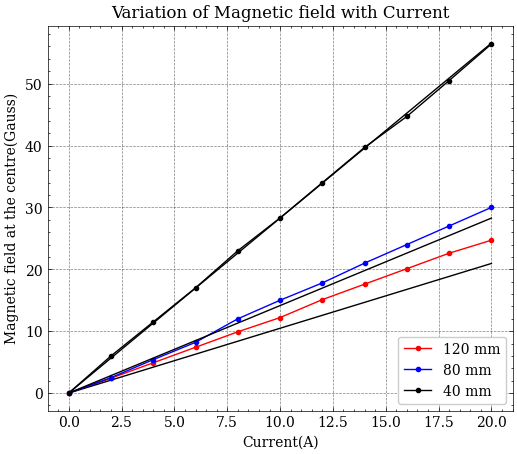

In [6]:

plt.figure(figsize=(6,5))
plt.title('Variation of Magnetic field with Current')
plt.plot(I,B_120,'r.-',label='120 mm')
plt.plot(I,B(10,I,0.06),'k-')
plt.plot(I,B_80,'b.-',label='80 mm')
plt.plot(I,B(9,I,0.04),'k-')
plt.plot(I,B_40,'k.-',label='40 mm')
plt.plot(I,B(9,I,0.02),'k-')
plt.ylabel('Magnetic field at the centre(Gauss)')
plt.xlabel('Current(A)')
plt.legend(loc='lower right')
#plt.savefig('BvsI.png',dpi=200)
plt.show()

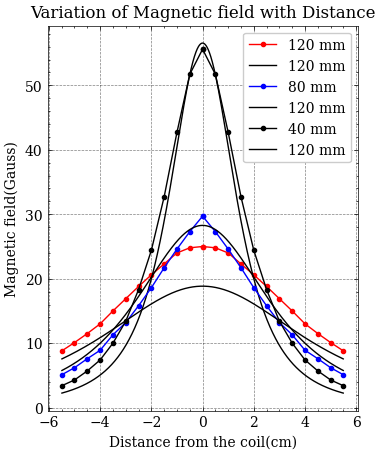

In [11]:
plt.figure(figsize=(4,5))
plt.title('Variation of Magnetic field with Distance')
plt.plot(mirror(d),reverse(Bd_120),'r.-',label='120 mm')
plt.plot(mirror(np.arange(0,5.5,0.01)),Bd(20,0.02,mirror(np.arange(0,5.5,0.01))),'k-',label='120 mm')
plt.plot(mirror(d),reverse(Bd_80-0.4),'b.-',label='80 mm')
plt.plot(mirror(np.arange(0,5.5,0.01)),Bd(20,0.04,mirror(np.arange(0,5.5,0.01))),'k-',label='120 mm')
plt.plot(mirror(d),reverse(Bd_40-0.3),'k.-',label='40 mm')
plt.plot(mirror(np.arange(0,5.5,0.01)),Bd(20,0.06,mirror(np.arange(0,5.5,0.01))),'k-',label='120 mm')
plt.ylabel('Magnetic field(Gauss)')
plt.xlabel('Distance from the coil(cm)')
plt.legend(loc='upper right')
plt.savefig('Bvsd.png',dpi=200)
plt.show()

In [12]:
#error
u=np.pi*4*(10**-3)
def err_r(R,I):
    err=np.sqrt((u*0.05/R)**2+(u*I*0.0005/R)**2)
    return err
a=err_r(0.02,20)
b=err_r(0.06,20)
c=err_r(0.04,20)
s=100*((a/55.2)+(b/29.7)+(c/25.3))
print(s/3)

0.05243794225163611
